# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.693711e+01     1.439081e+01
 * time: 0.001447916030883789
     1     3.555468e+01     1.030752e+01
 * time: 0.005659818649291992
     2     2.609802e+01     3.553307e+00
 * time: 0.011596918106079102
     3     2.202642e+01     4.523558e+00
 * time: 0.016698837280273438
     4     2.173060e+01     4.938246e+00
 * time: 0.021678924560546875
     5     2.076765e+01     2.309501e+00
 * time: 0.02663898468017578
     6     2.007607e+01     2.394954e+00
 * time: 0.031594038009643555
     7     1.948509e+01     2.766996e+00
 * time: 0.035588979721069336
     8     1.911667e+01     1.903246e+00
 * time: 0.03970599174499512
     9     1.858695e+01     1.242641e+00
 * time: 0.04419302940368652
    10     1.823465e+01     1.162305e+00
 * time: 0.04834389686584473
    11     1.804180e+01     8.249719e-01
 * time: 0.052426815032958984
    12     1.790121e+01     5.149621e-01
 * time: 0.05651497840881348
    13     1.782146e+01     5.871514e-01


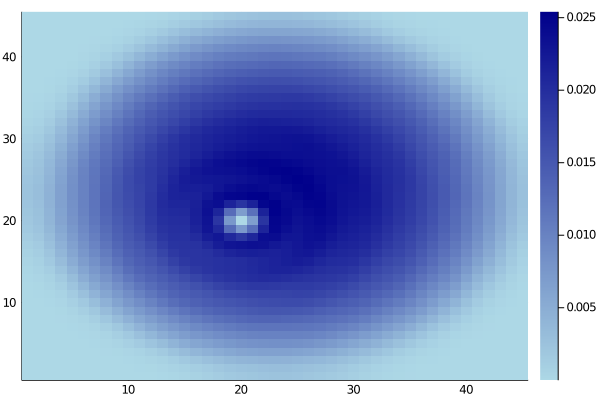

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)